In [1]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from owslib.wms import WebMapService

import geoengine as ge

%matplotlib inline

In [2]:
ge.initialize("http://localhost:3030")

In [3]:
session = ge.get_session()
session

Server:              http://localhost:3030
Session Id:          3a85a222-357b-4b6a-a2e3-edfb4818f042

In [4]:
workflow = ge.register_workflow({
                "type": "Raster",
                "operator": {
                    "type": "GdalSource",
                    "params": {
                        "dataset": {"internal": "36574dc3-560a-4b09-9d22-d5945f2b8093"}
                    }
                }
            })
workflow

5b9508a8-bd34-5a1c-acd6-75bb832d2d38

In [5]:
fake_capabilities = '''
<WMS_Capabilities xmlns="http://www.opengis.net/wms" xmlns:sld="http://www.opengis.net/sld" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" version="1.3.0" xsi:schemaLocation="http://www.opengis.net/wms http://schemas.opengis.net/wms/1.3.0/capabilities_1_3_0.xsd http://www.opengis.net/sld http://schemas.opengis.net/sld/1.1.0/sld_capabilities.xsd">
    <Service>
        <Name>WMS</Name>
        <Title>Geo Engine WMS</Title>
    </Service>
    <Capability>
        <Request>
            <GetCapabilities>
                <Format>text/xml</Format>
                <DCPType>
                    <HTTP>
                        <Get>
                            <OnlineResource xlink:href="{wms_url}"/>
                        </Get>
                    </HTTP>
                </DCPType>
            </GetCapabilities>
            <GetMap>
                <Format>image/png</Format>
                <DCPType>
                    <HTTP>
                        <Get>
                            <OnlineResource xlink:href="{wms_url}"/>
                        </Get>
                    </HTTP>
                </DCPType>
            </GetMap>
        </Request>
        <Exception>
            <Format>XML</Format>
            <Format>INIMAGE</Format>
            <Format>BLANK</Format>
        </Exception>
        <Layer queryable="1">
            <Name>{layer_name}</Name>
            <Title>{layer_name}</Title>
            <CRS>EPSG:4326</CRS>
            <BoundingBox CRS="EPSG:4326" minx="-90.0" miny="-180.0" maxx="90.0" maxy="180.0"/>
        </Layer>
    </Capability>
</WMS_Capabilities>
'''.format(wms_url = 'http://localhost:3030/wms', layer_name = '5b9508a8-bd34-5a1c-acd6-75bb832d2d38')

In [6]:
print(fake_capabilities)


<WMS_Capabilities xmlns="http://www.opengis.net/wms" xmlns:sld="http://www.opengis.net/sld" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" version="1.3.0" xsi:schemaLocation="http://www.opengis.net/wms http://schemas.opengis.net/wms/1.3.0/capabilities_1_3_0.xsd http://www.opengis.net/sld http://schemas.opengis.net/sld/1.1.0/sld_capabilities.xsd">
    <Service>
        <Name>WMS</Name>
        <Title>Geo Engine WMS</Title>
    </Service>
    <Capability>
        <Request>
            <GetCapabilities>
                <Format>text/xml</Format>
                <DCPType>
                    <HTTP>
                        <Get>
                            <OnlineResource xlink:href="http://localhost:3030/wms"/>
                        </Get>
                    </HTTP>
                </DCPType>
            </GetCapabilities>
            <GetMap>
                <Format>image/png</Format>
                <DCPType>
                    <HTTP>

Layer Name: 5b9508a8-bd34-5a1c-acd6-75bb832d2d38 Title: 5b9508a8-bd34-5a1c-acd6-75bb832d2d38


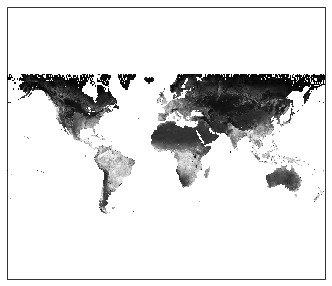

In [8]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mercator())

wms = WebMapService('http://peter.geoengine.io:6060/wms',
                    version='1.3.0',
                    xml=fake_capabilities)

print(wms['5b9508a8-bd34-5a1c-acd6-75bb832d2d38'])

#ax.coastlines()

ax.add_wms(wms, layers=['5b9508a8-bd34-5a1c-acd6-75bb832d2d38'], wms_kwargs={'time': '2014-01-01T00:00:00.0Z'})

plt.show()

In [ ]:
time = datetime.strptime(
    '2014-04-01T12:00:00.000Z', "%Y-%m-%dT%H:%M:%S.%f%z")

workflow.plot_image(
    Bbox(
                    [-180.0, -90.0, 180.0, 90.0],
                    [time, time]
                )
)